<a href="https://colab.research.google.com/github/GreNinja47/Gender-Age-Predicting-CCN-Model-/blob/main/Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from keras.models import load_model
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [ ]:
age=[]

gender=[]

img =[]

for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img.append(file)

In [ ]:
print(len(age))
print(len(gender))
print(len(img))

23708
23708
23708


In [ ]:
df = pd.DataFrame({'age':age,'gender':gender,'img':img})

In [ ]:
rows_to_delete = df['img'].str.contains('30_0_0_20170117153441021.jpg.chip.jpg|16_0_4_20170104011805376.jpg.chip.jpg')

df = df[~rows_to_delete]

In [ ]:
df.tail()

,age,gender,img
23703,54,0,54_0_0_20170111210429835.jpg.chip.jpg
23704,4,1,4_1_0_20161219201246716.jpg.chip.jpg
23705,72,1,72_1_0_20170110180409214.jpg.chip.jpg
23706,60,1,60_1_0_20170110150258412.jpg.chip.jpg
23707,1,0,1_0_4_20161221202006449.jpg.chip.jpg


In [ ]:
# Load the best model
best_model_age = load_model("/content/drive/MyDrive/Saved_models/Age_Gender_predictor/best_model_age.h5")
best_model_gender = load_model("/content/drive/MyDrive/Saved_models/Age_Gender_predictor/best_model_gender.h5")

In [ ]:
def process_and_predict(file):
    # Load the image
    img = Image.open("UTKFace/" + df.img[file])

    # Load and preprocess the image for prediction
    img = image.load_img("UTKFace/" + df.img[file], target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)

    # Predict age and gender
    age_pred = best_model_age.predict(img_array)[0][0]
    gender_pred = best_model_gender.predict(img_array)[0][0]
    predicted_gender = 'male' if gender_pred < 0.5 else 'female'

    # Actual age and gender
    actual_age = df['age'][file]
    actual_gender = 'male' if df['gender'][file] < 0.5 else 'female'

    return img, actual_age, actual_gender, int(age_pred), predicted_gender

1/1 [==============================] - 0s 72ms/step


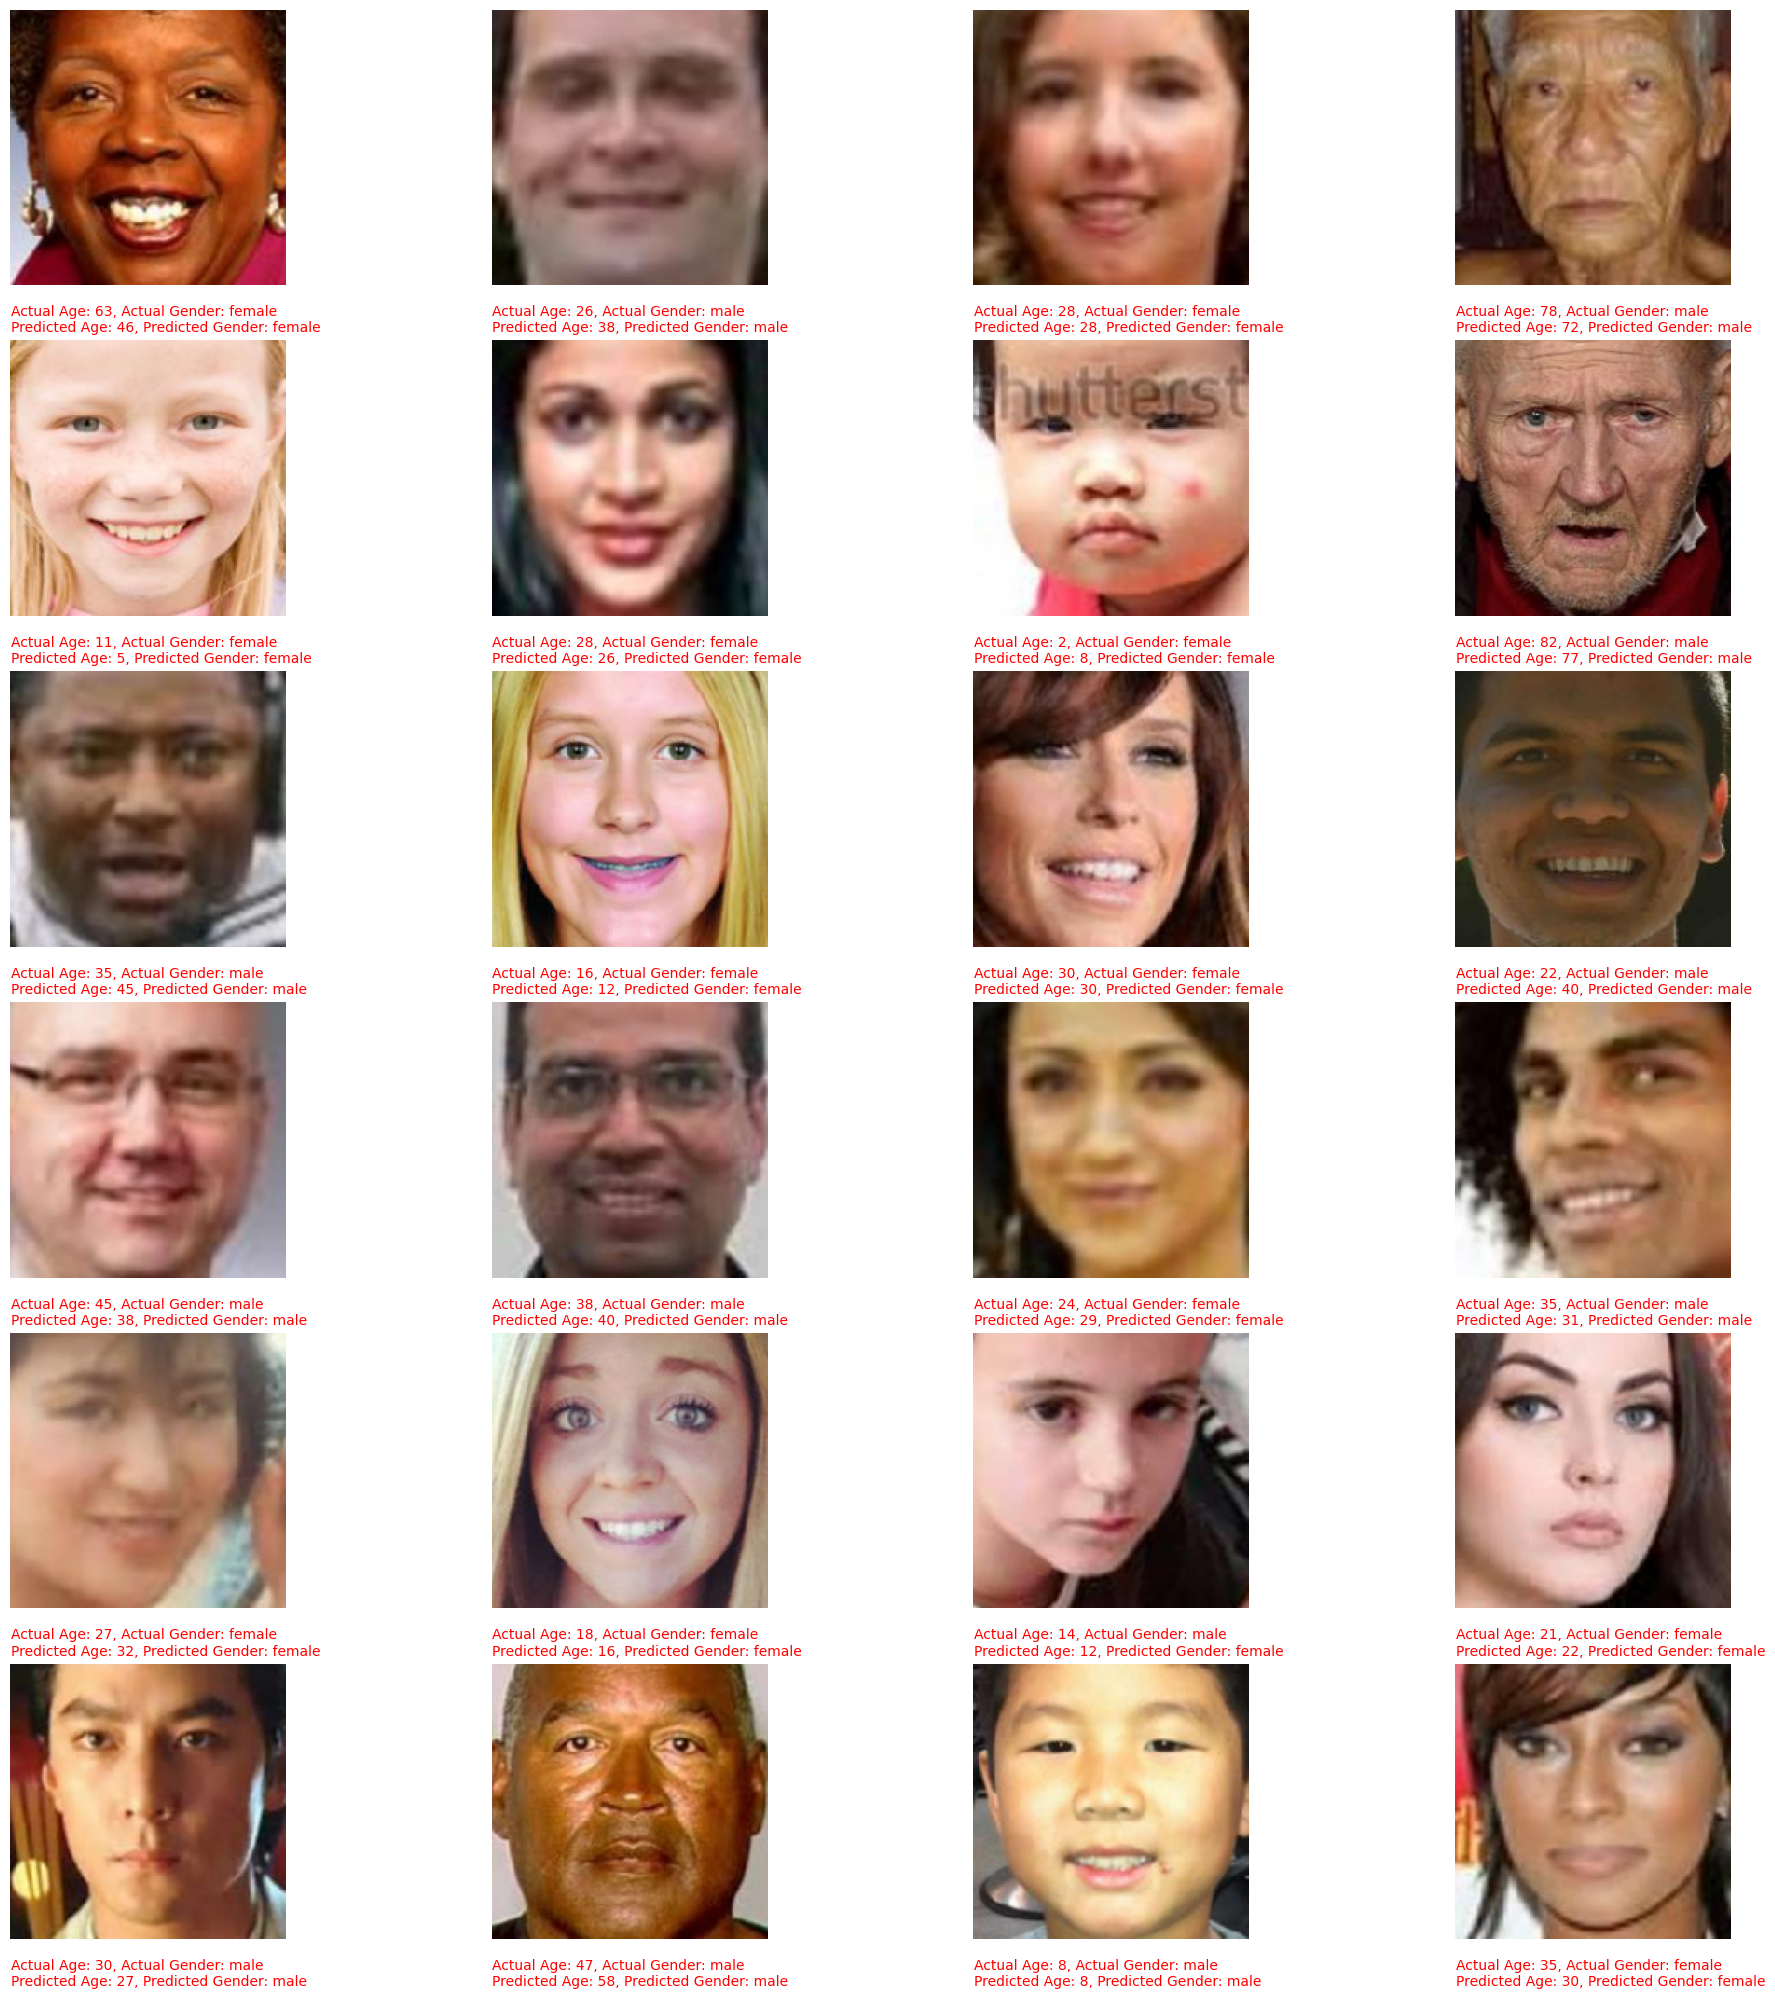

In [ ]:
# Create a figure for the grid with more space
fig, axs = plt.subplots(6, 4, figsize=(20, 20))

# Generate and process the images, and print results in the grid
for i in range(24):
    # Randomly select an index from the DataFrame
    index = random.randint(0, len(df) - 1)

    # Inside the loop
    if os.path.exists("UTKFace/" + df.img[index]):
        img, actual_age, actual_gender, predicted_age, predicted_gender = process_and_predict(index)  # Call process_and_predict function
        axs[i // 4, i % 4].imshow(img)
        axs[i // 4, i % 4].axis('off')

        # Print age and gender slightly below the image
        axs[i // 4, i % 4].text(0, img.size[1] + 30, f'Actual Age: {actual_age}, Actual Gender: {actual_gender}\nPredicted Age: {predicted_age}, Predicted Gender: {predicted_gender}', color='red')

plt.tight_layout()
plt.show()

Observation and Results :

The model built from scratch without relaying on Large model transformers as still performed its best in predicting the results as any human observer, whowever some prediction were not accurate as the image data consists of people from different ethnicity and data inconsistency among certain age groups.

Limitation and Future Scope:


* During the manual review of the data, I encountered some problems with data
annotation, particularly with incorrect gender labels which I corrected manually. However, identifying and rectifying mislabeled ages proved to be more challenging.

* Inconsistencies were observed in the data across different age groups, potentially introducing bias into our predictions. Ensuring uniformity in data collection across all age demographics could have improved the accuracy of predictions.

* The model's predictive capabilities are affected by the overrepresentation of certain genders and ethnicities appearing younger compared to other racial groups in the images. Training the model on homogeneous datasets, focusing on individual nationalities and genders, could potentially enhance its performance.